<a href="https://colab.research.google.com/github/SarahSouzaPontes/knn/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###KNN

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
dados = pd.read_csv(url)
dados.head()
#carregar dados e instalando pandas

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#mise en place
dados [ 'smoker'] = dados [ 'smoker'].map({'yes':1, 'no': 0})
dados [ 'charges'] = dados [ 'charges']/1000
dados = dados [['bmi', 'smoker', 'charges']]
dados.head()
#modificacao de escala
#nao é normalização nem balanceamento,
#ajustando apenas escala dos numeros
#separando variaveis se é fumante ou nao, custos e massa corporea
#modificando para 1 e 0 fumantes ou nao

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [ ]:
from sklearn.linear_model import LinearRegression #modelo 24:08
from sklearn.metrics import mean_squared_error #metrica
from sklearn.model_selection import train_test_split #validacao

import numpy as np
#importando modelo, metrica e validacao/ numpy para albebra
R = 100
eqms = []

x = dados [['bmi', 'smoker']]
y = dados ['charges']

for i in range(R):
  xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.25)
  reg = LinearRegression()
  reg.fit(xtreino, ytreino)
  preditos = reg.predict(xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)
   
print(np.mean(eqms))
#repeticoes e guardar resultados para as repeticoes poerdar a media dos valores e dar um resultado mais estável
#r é repeticoes = a 100
#LISTA eqms guardados []
#definiu x e y
#for repetir procedimento e guardar na lista
#regressao linear 
#erro quadratico medio guardado na lista e calcular media dos eqms e printa na tela
#2 variaveis repetindo 100 vezes, variando resultado a cada ve que rodar, mas como é uma media varia pouco.


50.27185753748259


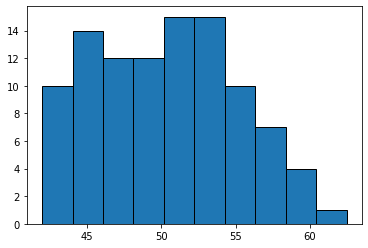

In [ ]:
import matplotlib.pyplot as plt
plt.hist(eqms, edgecolor = 'black')
plt.show()
#resultado de todos eqms calculados acima

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

K = 7
R = 100
# n de repeticoes r = 100
# escolhendo o k = 7 n de vizinhos
eqms_treino = []
eqms_teste = []

x = dados [['bmi']]
y = dados [['charges']]

for i in range(R):
  xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.25)

  knn = KNeighborsRegressor(n_neighbors = K)
  knn.fit(xtreino, ytreino)

  preditos_treino = knn.predict(xtreino)
  eqm_treino = mean_squared_error(preditos_treino, ytreino)
  eqms_treino.append(eqm_treino)
# usando 1 variavel apenas
  preditos_teste = knn.predict(xteste)
  eqm_teste = mean_squared_error(preditos_teste, yteste)
  eqms_teste.append(eqm_teste)
#imprimindo na tela
print (' O EQM de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print (' O EQM de TESTE foi: {:.2f}'.format(np.mean(eqms_teste)))
# o que importa é o teste
#resultado demonstra overfitting pq o de teste é melhor que treino o desempenho

 O EQM de TREINO foi: 123.65
 O EQM de TESTE foi: 160.50


In [ ]:
xtreino[['bmi']]

,bmi
369,30.400
1032,27.930
1263,29.900
1046,25.080
953,30.200
...,...
780,24.400
536,38.900
34,36.400
225,33.880


#Gráfico do KNN com 1 variável
ter um desempenho melhor nos dados de teste que o treino induz overfitting


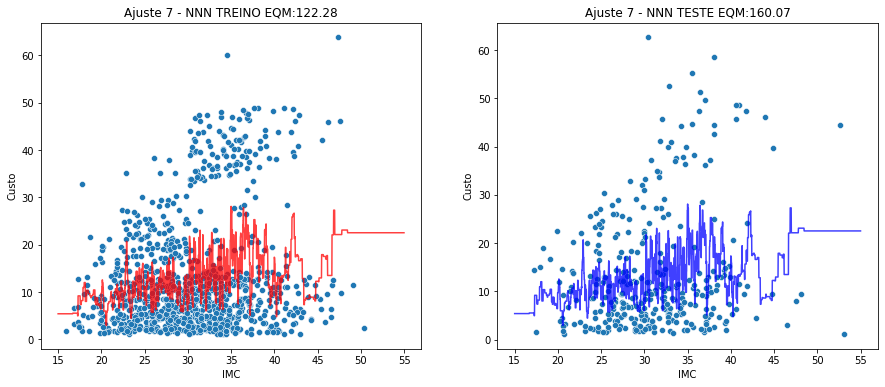

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x = dados [['bmi']]
y = dados ['charges']


xtreino, xteste, ytreino, yteste = train_test_split(x,y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = K)
knn.fit(xtreino, ytreino)

preditos_treino = knn.predict(xtreino)
preditos_teste = knn.predict(xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))
#ajuste do modelo

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x = xtreino['bmi'], y = ytreino)
plt.plot(x,y, color = 'red', alpha = 0.75)
plt.title('Ajuste {} - NNN TREINO EQM:'.format(K) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1,2,2)
sns.scatterplot(x = xteste['bmi'], y = yteste)
plt.plot(x,y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {} - NNN TESTE EQM:'.format(K) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()
#usando o k = 7 entao a curva nao é o ideal pode-se aumentar o k para 37 por exemplo, esperando uma curva mais suave
# treino esquerda e a direita teste;
# eqms é uma repeticao apenas no grafico



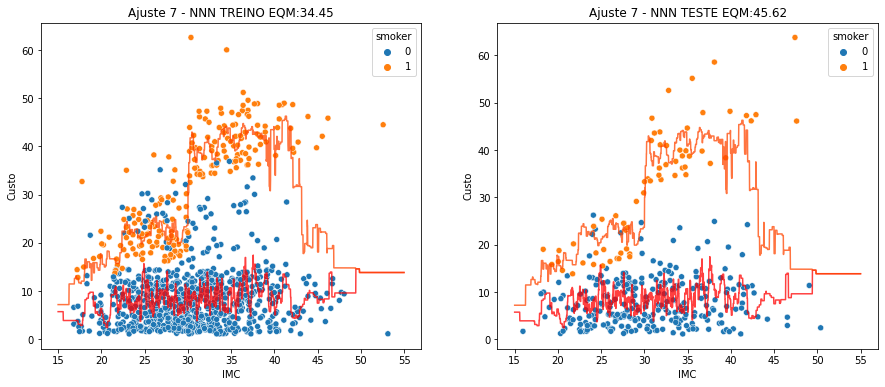

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi', 'smoker']]
y = dados['charges']

#2 variaveis no modelo

xtreino, xteste, ytreino, yteste = train_test_split(X,y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = K)
knn.fit(xtreino, ytreino)

preditos_treino = knn.predict(xtreino)
preditos_teste = knn.predict(xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

x = np.arange(15, 55, 0.01)
v0=np.zeros(len(x))
v1=np.ones(len(x))

c0= pd.DataFrame([x,v0], index = ['bmi', 'smoker']).T
c1= pd.DataFrame([x,v1], index = ['bmi', 'smoker']).T

d0 = knn.predict(c0)
d1 = knn.predict(c1)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x = xtreino['bmi'], y = ytreino, hue = xtreino['smoker'])
plt.plot(x,d0, color = 'red', alpha = 0.75)
plt.plot(x,d1, color = 'orangered', alpha = 0.75)
plt.title('Ajuste {} - NNN TREINO EQM:'.format(K) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1,2,2)
sns.scatterplot(x = xteste['bmi'], y = yteste, hue = xteste['smoker'])
plt.plot(x,d0, color = 'red', alpha = 0.75)
plt.plot(x,d1, color = 'orangered', alpha = 0.75)
plt.title('Ajuste {} - NNN TESTE EQM:'.format(K) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()
#amarelo
#azul
#laranja
#nuvem esta bem sobre a curva
#aumentar o numero de vizinhos so pode aumentar ate 1003 que é o n de linhas


In [ ]:
xtreino.shape #vizinhos maximos o memso numero de linhas

(1003, 2)

Comparação dos Modelos

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25):

  eqms_treino = []
  eqms_teste = []
  for i in range(replicas):
      xtreino, xteste, ytreino, yteste = train_test_split(X, y, test_size = proporcao)

      #Treinando o modelo
      reg = modelo
      reg.fit(xtreino, ytreino)

      #verificando o eqm no teste
      preditos_treino = reg.predict(xtreino)
      eqm_treino = mean_squared_error(ytreino, preditos_treino)

      preditos_teste = reg.predict(xteste)
      eqm_teste = mean_squared_error(yteste, preditos_teste)

      #Guardando resultado
      eqms_treino.append(eqm_treino)
      eqms_teste.append(eqm_teste)

  res_treino = np.array(eqms_treino).mean().round(2)
  res_teste = np.array(eqms_teste).mean().round(2)

  print(' O EQM de TREINO foi: {:.2f}'.format(res_treino))
  print(' O EQM de TESTE foi: {:.2f}'.format(res_teste))

  return res_treino, res_teste

In [ ]:
HoldoutRepetido(modelo = KNeighborsRegressor())


 O EQM de TREINO foi: 31.25
 O EQM de TESTE foi: 47.63


(31.25, 47.63)

In [ ]:
HoldoutRepetido(modelo = KNeighborsRegressor(n_neighbors = 20))

 O EQM de TREINO foi: 48.61
 O EQM de TESTE foi: 54.57


(48.61, 54.57)

In [ ]:
X = dados [['bmi', 'smoker']]
y = dados [ 'charges']

modelos = [ LinearRegression(),
           KNeighborsRegressor(n_neighbors = 5),
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           ]

nomes = [ 'Regressão Linear',
         'KNN - K = 5',
         'KNN - K = 15',
         'KNN - K = 25',
         'KNN - K = 35',
         'KNN - K = 45',
         ]

treinos = []
testes = []

for modelo in modelos:
  resultados = HoldoutRepetido(modelo)
  treinos.append(resultados[0])
  testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

#knn com melhor modelo foi com 5 (performace)


 O EQM de TREINO foi: 50.09
 O EQM de TESTE foi: 50.44
 O EQM de TREINO foi: 31.22
 O EQM de TESTE foi: 47.41
 O EQM de TREINO foi: 44.07
 O EQM de TESTE foi: 50.80
 O EQM de TREINO foi: 54.04
 O EQM de TESTE foi: 60.84
 O EQM de TREINO foi: 67.42
 O EQM de TESTE foi: 73.60
 O EQM de TREINO foi: 80.54
 O EQM de TESTE foi: 84.76


,EQM Treino,EQM Teste
KNN - K = 5,31.22,47.41
Regressão Linear,50.09,50.44
KNN - K = 15,44.07,50.80
KNN - K = 25,54.04,60.84
KNN - K = 35,67.42,73.60
KNN - K = 45,80.54,84.76
